In [ ]:
!pip install --upgrade tensorflow-federated

In [ ]:
import tensorflow_federated as tff
import pickle

In [ ]:
(train, test) = tff.simulation.datasets.celeba.load_data(
    split_by_clients=True, cache_dir=None
)

In [ ]:
test_ds = test.create_tf_dataset_from_all_clients()

In [ ]:
train_ds = train.create_tf_dataset_from_all_clients()

In [ ]:
test_X = test_ds.map(lambda x: (x['image']/255,x['smiling']))  # obraz


In [ ]:
train_X = train_ds.map(lambda x: (x['image']/255,x['smiling'])).batch(256)   # obraz

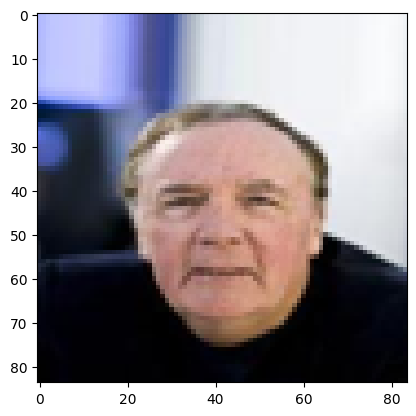

In [ ]:
import matplotlib.pyplot as plt

elem = next(iter(test_X))
data, label = elem
plt.imshow(data)

In [ ]:
test_X = test_ds.map(lambda x: (x['image']/255,x['smiling'])).batch(256)  # obraz

In [ ]:
import numpy as np

X_test_scaled_list = []


for image_matrix in test_X:
    X_test_scaled_list.append(image_matrix)


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential
import tensorflow as tf

#budowa modelu
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same',
                 input_shape=(84,84,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

#kompilacja modelu
opt = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

#trenowanie
history = model.fit(train_X, epochs=20, verbose=True,
                   validation_data=(test_X))

# [test_loss, test_acc] = model.evaluate(test_X)
# print(f"Evaluation result on Test Data : Loss = {test_loss}, accuracy = {test_acc}")


Epoch 1/20
705/705 [==============================] - 220s 290ms/step - loss: 0.4776 - accuracy: 0.7791 - val_loss: 0.2775 - val_accuracy: 0.8807
Epoch 2/20
705/705 [==============================] - 192s 272ms/step - loss: 0.2954 - accuracy: 0.8746 - val_loss: 0.2387 - val_accuracy: 0.8980
Epoch 3/20
705/705 [==============================] - 192s 272ms/step - loss: 0.2671 - accuracy: 0.8877 - val_loss: 0.2353 - val_accuracy: 0.8990
Epoch 4/20
705/705 [==============================] - 192s 272ms/step - loss: 0.2523 - accuracy: 0.8940 - val_loss: 0.2272 - val_accuracy: 0.9035
Epoch 5/20
705/705 [==============================] - 191s 271ms/step - loss: 0.2433 - accuracy: 0.8993 - val_loss: 0.2189 - val_accuracy: 0.9059
Epoch 6/20
705/705 [==============================] - 202s 287ms/step - loss: 0.2367 - accuracy: 0.9016 - val_loss: 0.2176 - val_accuracy: 0.9060
Epoch 7/20
705/705 [==============================] - 190s 269ms/step - loss: 0.2310 - accuracy: 0.9047 - val_loss: 0.2068 -

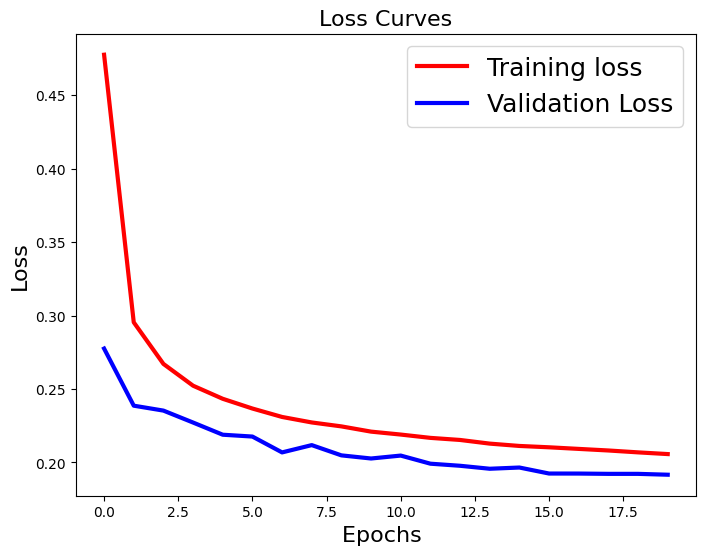

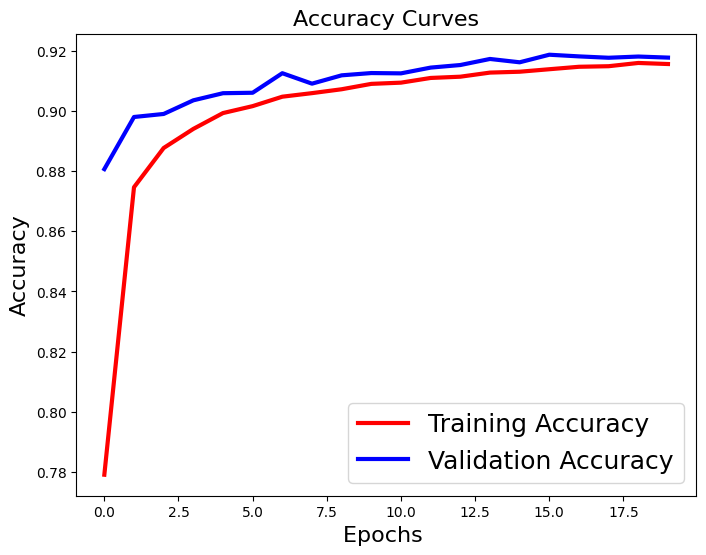

In [ ]:
def plot_history(history):
    #Plot the Loss Curves
    plt.figure(figsize=[8,6])
    plt.plot(history.history['loss'],'r',linewidth=3.0)
    plt.plot(history.history['val_loss'],'b',linewidth=3.0)
    plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Loss',fontsize=16)
    plt.title('Loss Curves',fontsize=16)
    #Plot the Accuracy Curves
    plt.figure(figsize=[8,6])
    plt.plot(history.history['accuracy'], 'r', linewidth=3.0)
    plt.plot(history.history['val_accuracy'], 'b',linewidth=3.0)
    plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Accuracy',fontsize=16)
    plt.title('Accuracy Curves',fontsize=16)

plot_history(history)